# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Itvedant class/Itvedant Home work/Churn_Modelling.csv')

# Data Inspection

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Dropping unimportant column
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [9]:
df.shape

(10000, 11)

# Checking Null Values

In [10]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No null values present in the dataset.

# Checking Outliers

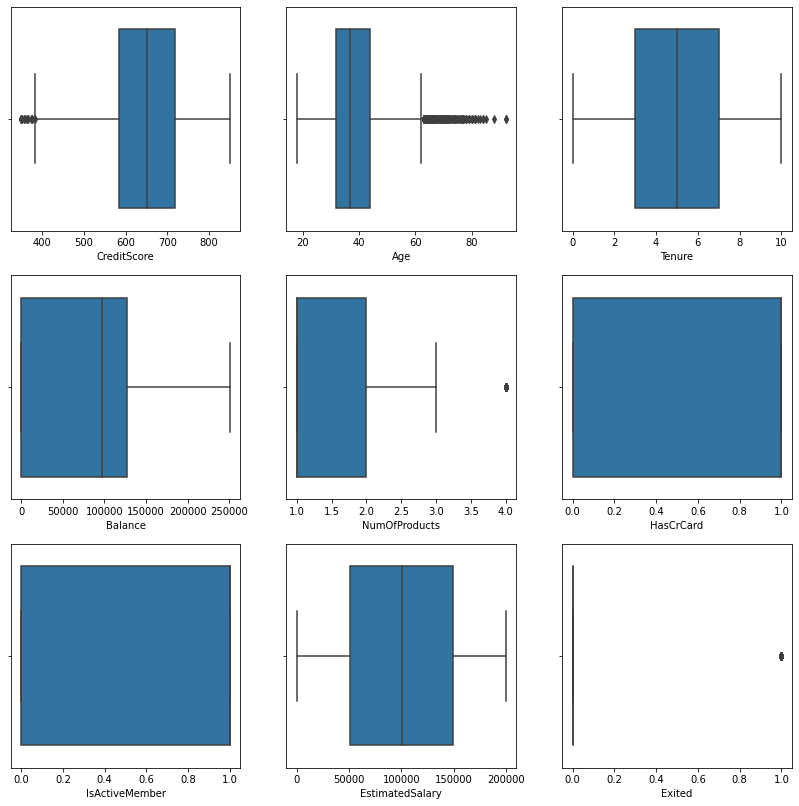

In [11]:
i = 1
plt.figure(figsize=(14,14))
for x in df.columns:
  if df[x].dtypes != 'O':
    plt.subplot(3,3,i)
    sns.boxplot(df[x])
    i+=1

No outliers, all data points looks in cluster.

# Visualization & Analysis

In [12]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


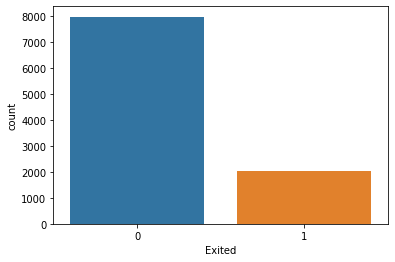

In [13]:
sns.countplot(df.Exited)

Exited = 1 = Stay
Exited = 0 = Exit

*Looks like data is very imbalanced, so need to use resampling tecnhiques.*

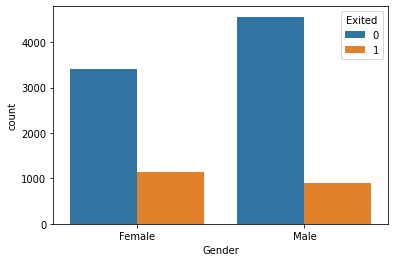

In [14]:
sns.countplot(df.Gender,hue=df.Exited)

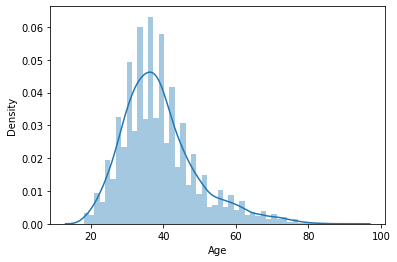

In [15]:
sns.distplot(df['Age'])

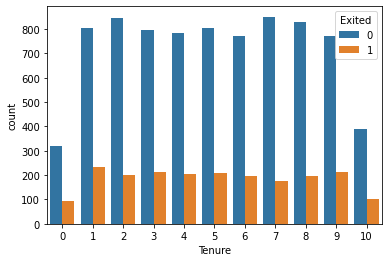

In [16]:
sns.countplot(df.Tenure,hue=df.Exited)

In [17]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


# Create X and Y

In [18]:
X = df.drop('Exited',axis=1)
Y = df.Exited

# Label Encoding X

In [19]:
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = ['Geography','Gender']
for x in col:
  X[x] = le.fit_transform(X[x])


# Checking Skewness

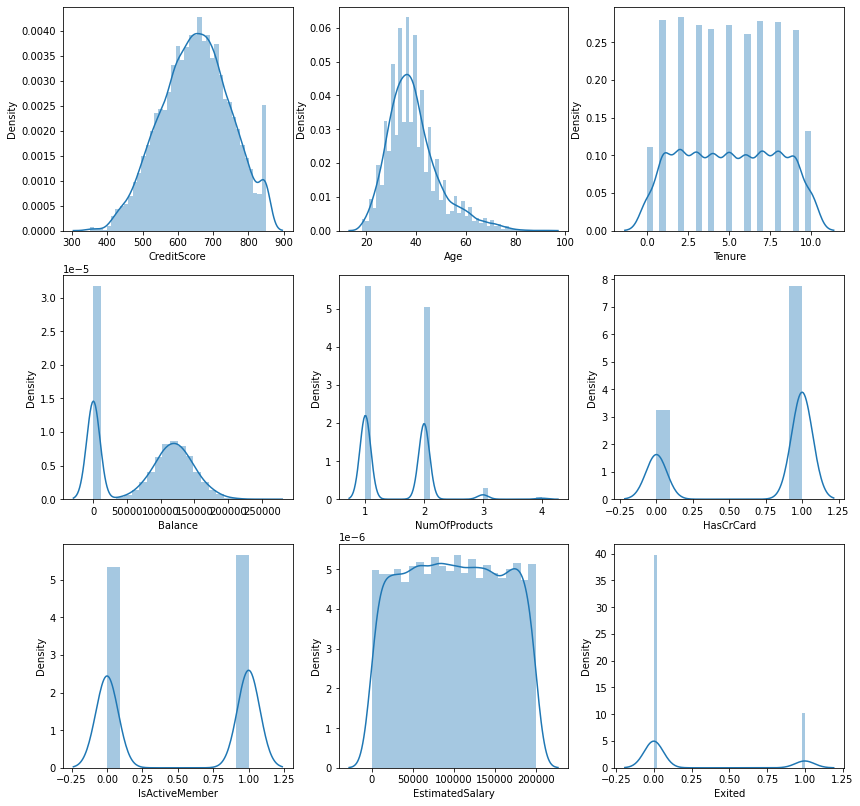

In [21]:
i = 1
plt.figure(figsize=(14,14))
for x in df.columns:
  if df[x].dtypes != 'O':
    plt.subplot(3,3,i)
    sns.distplot(df[x])
    i+=1

In [22]:
# Cube root transformation of X for handling skewness
X = np.cbrt(X)

# Scaling of X

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

# Using Resampling Technique

In [24]:
# Returning to one dataframe
training_set = pd.concat([X_train, y_train], axis=1)

In [25]:
training_set

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7635,8.020779,0.000000,0.0,3.072317,1.259921,47.174329,1.000000,1.0,0.0,53.990225,0
5284,9.065368,1.000000,1.0,3.708430,1.442250,46.289277,1.000000,1.0,1.0,30.695687,0
1457,9.472682,0.000000,1.0,4.041240,1.587401,0.000000,1.259921,0.0,1.0,40.072950,0
4785,7.989570,0.000000,0.0,2.802039,1.442250,53.927926,1.000000,0.0,0.0,35.403345,0
9158,8.143253,1.259921,0.0,3.141381,2.154435,49.070666,1.000000,1.0,1.0,54.064346,0
...,...,...,...,...,...,...,...,...,...,...,...
5090,7.796975,0.000000,0.0,3.107233,2.080084,0.000000,1.259921,0.0,0.0,39.823855,0
9358,9.424142,0.000000,0.0,3.072317,2.080084,0.000000,1.259921,1.0,1.0,34.723332,0
813,7.494811,1.000000,1.0,3.036589,2.000000,49.648768,1.442250,1.0,1.0,44.650357,1
451,9.472682,0.000000,1.0,3.419952,2.080084,0.000000,1.259921,0.0,1.0,49.218837,0


In [26]:
# Separating classes
exited = training_set[training_set.Exited == 0]
not_exited = training_set[training_set.Exited == 1]

In [27]:
len(exited)

5574

In [28]:
len(not_exited)

1426

# ADASYN Resampling Technique

In [56]:
from imblearn.over_sampling import ADASYN

In [57]:
# oversampling using ADASYN
stom = ADASYN(random_state=42)
stom_x_train, stom_y_train = stom.fit_resample(X_train, y_train)

In [58]:
# Separate into training and test sets
stom_x_train = pd.DataFrame(stom_x_train, columns = X_train.columns)
stom_y_train = pd.DataFrame(stom_y_train, columns = ['Exited'])

In [59]:
stom_y_train.value_counts()

Exited
0         5574
1         5501
dtype: int64

In [60]:
# Sampling
ss = StandardScaler()
X_train_ss = ss.fit_transform(stom_x_train)
X_test_ss = ss.transform(X_test)

# Keras Tuner


In [61]:
# install keras tuner 
!pip install keras-tuner -q

In [62]:
from kerastuner import RandomSearch,Objective
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Recall
from tensorflow.keras.metrics import SpecificityAtSensitivity

In [72]:
# function to create model 
def build_model(hp):
    model = Sequential()
    model.add(Dense(20, activation="relu",input_dim = 10))
    for i in range(hp.Int('num_layers',2,15)):                                  # choose hidden layers between 2 to 20 

      model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=20,
                                            max_value=800,
                                            step=30),
                               activation=hp.Choice('dense_activation',values=['relu', 'tanh'])))

    model.add(Dense(1, activation="sigmoid"))

    model.compile(
              optimizer=Adam(
            hp.Choice("learning_rate", values=[1e-1,1e-2, 1e-3])          # choose learning rate
        ),
        loss="binary_crossentropy",   
        #metrics=['accuracy']          
        metrics=[Recall()]   
        #metrics=[SpecificityAtSensitivity(0.7)]   

    )
    return model

In [73]:
tuner_stom = RandomSearch(
    build_model,
    metrics=[Recall(name='recall')],
    #metrics=[SpecificityAtSensitivity(0.7,name='sp')],

    objective=Objective('recall',direction='max'),
    #objective=Objective('sp',direction='max'),

    #metrics=['accuracy'],
    #objective='val_accuracy',
    #objective='val_loss',

    max_trials=5,
    executions_per_trial=3,
    overwrite=True,
    directory="my_dir5",
    project_name="churn5",
)

In [74]:
tuner_stom.search(stom_x_train, stom_y_train, epochs=5, validation_data=(X_test_ss, y_test))

Trial 5 Complete [00h 01m 39s]
recall: 0.7596800724665324

Best recall So Far: 0.7633763551712036
Total elapsed time: 00h 07m 02s
INFO:tensorflow:Oracle triggered exit


In [75]:
tuner_stom.results_summary()

Results summary
Results in my_dir5/churn5
Showing 10 best trials
Objective(name='recall', direction='max')
Trial summary
Hyperparameters:
num_layers: 14
units_0: 260
dense_activation: relu
units_1: 230
learning_rate: 0.001
units_2: 20
units_3: 20
units_4: 20
units_5: 20
units_6: 20
units_7: 20
units_8: 20
units_9: 20
units_10: 20
units_11: 20
units_12: 20
units_13: 20
Score: 0.7633763551712036
Trial summary
Hyperparameters:
num_layers: 9
units_0: 50
dense_activation: relu
units_1: 470
learning_rate: 0.001
units_2: 260
units_3: 350
units_4: 410
units_5: 410
units_6: 530
units_7: 470
units_8: 80
units_9: 170
units_10: 20
units_11: 620
units_12: 410
units_13: 470
Score: 0.7596800724665324
Trial summary
Hyperparameters:
num_layers: 7
units_0: 740
dense_activation: relu
units_1: 620
learning_rate: 0.01
units_2: 170
units_3: 290
units_4: 350
units_5: 140
units_6: 470
units_7: 140
units_8: 770
units_9: 770
units_10: 710
units_11: 560
units_12: 200
units_13: 110
Score: 0.5991031924883524
Trial

In [76]:
models_stom = tuner_stom.get_best_models(num_models=10)

In [83]:
yprestom = models_stom[1].predict(X_test_ss)

In [84]:
from sklearn.metrics import classification_report,recall_score
yprestom = np.where(yprestom >= 0.5,1,0)

print(classification_report(y_test,yprestom))

print(recall_score(y_test,yprestom))

              precision    recall  f1-score   support

           0       0.88      0.64      0.75      2389
           1       0.33      0.67      0.44       611

    accuracy                           0.65      3000
   macro avg       0.61      0.66      0.59      3000
weighted avg       0.77      0.65      0.68      3000

0.6710310965630114
